In [1]:
import arcpy
import arcgis
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer
from arcgis.geoprocessing import import_toolbox
from arcgis.features import FeatureCollection
from arcgis.widgets import MapView
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML
from IPython.display import Image
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Variables
username = "EmilyThompsonlike"                                    # AGOL Username
password = "dgsr2342fgdrtgec"                                      # AGOL Password
wmItemId = "7966469ee4c2498b93b991f1cd0e7416"
fsItemId = "d8d6020b4afd482ba47a349951e67771"                     # Feature Service Item ID to update
mygis = arcgis.GIS("https://qing2f200ca05bc1.maps.arcgis.com/", username, password)

In [3]:
webmap_item = mygis.content.get(wmItemId)
webmap = WebMap(webmap_item)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [4]:
# Create a MapView and set its WebMap
map_view = MapView(gis=mygis, item=webmap)
# Display the MapView
# map_view

In [5]:
# Feature Service
pipe_feature_layer= mygis.content.get(fsItemId).layers[1]
# pipe_feature_layer

In [6]:
query = "ID = 'YS020775_YS020771'"

# Perform the query
query_result = pipe_feature_layer.query(where=query)
# Access the first Item that's returned
selected_pipe = query_result.features[0]

# selected_pipe

# Summary of pipeline defect issues

In [7]:
cLineSymbol = {
    "type": "esriSLS",   # Simple Line Symbol
    "style": "esriSLSSolid",  # Line style: solid, dashed, etc.
    "color": [0, 0, 255, 255],  # RGBA color format (Blue color in this case)
    "width": 2  # Line width in pixels
}
sel_layer = FeatureCollection.from_featureset(fset=query_result,symbol = cLineSymbol)
webmap.add_layer(sel_layer)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [8]:
# YouTube video URL (video ID can be extracted from the full URL)
video_id = '6RRcLSKql-4'  # Replace with your YouTube video ID

# HTML code to embed the YouTube video
video_html = f"""
<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}" 
        frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen></iframe>
"""

# Display the video
display(HTML(video_html))

In [9]:
print("(a) hole in pipe; (b) roots mass; (c) deformed pipe, multiple fractures, surface damage; (d) broken pipe with pieces missing")
# Path
image_url = 'https://www.researchgate.net/profile/Leon-Gay/publication/309272824/figure/fig1/AS:1131757692829698@1646843469274/Pipe-defects-inside-a-sewer-mainline-a-hole-in-pipe-b-roots-mass-c-deformed.jpg'  # Replace with the path to your local image file

# Display the image
display(Image(url=image_url, width=600, height=400))

(a) hole in pipe; (b) roots mass; (c) deformed pipe, multiple fractures, surface damage; (d) broken pipe with pieces missing


# Summary of tracing result

In [10]:
# toolbox_url =
#   "https://ldy.ldyagol.com:6443/arcgis/rest/services/portfolio/Model/GPServer"



# Upstream or Downstream
direction = "Upstream"

# Set the path to your toolbox (either .tbx or .atbx format)
arcpy.ImportToolbox(r"D:\projects\arcgis\portfolio\portfolio.atbx")
# Call the tool using its alias and tool name
result = arcpy.portfolioatbx.TraceFacilities(Direction = direction, Expression = query, FLT_JSONToFeatures = r"D:\projects\arcgis\portfolio\portfolio.gdb\FLT_JSONToFeatures") 
# Print the results
# print(result.getOutput(0))

In [11]:
# Path to the specific feature class in your geodatabase
result_feature_class_path = result.getOutput(0)
# Load the feature class into a Spatial DataFrame
result_sdf = pd.DataFrame.spatial.from_featureclass(result_feature_class_path)

# Display the first few records
# result_sdf.head()

In [12]:
rLineSymbol = {
    "type": "esriSLS",   # Simple Line Symbol
    "style": "esriSLSSolid",  # Line style: solid, dashed, etc.
    "color": [255, 255, 255, 255],  # RGBA color format (White color in this case)
    "width": 2  # Line width in pixels
}
# Define the renderer using the custom symbol
rRenderer = {
    "type": "simple",  # Simple renderer
    "symbol": rLineSymbol
}

# sel_layer = FeatureCollection.from_featureset(fset=query_result,symbol = rLineSymbol)
# Publish the spatial dataframe as a feature layer
sdf_lyr = result_sdf.spatial.to_featurelayer(
    title="The Result Feature Layer",
    gis=mygis
)
webmap.add_layer(sdf_lyr,{"renderer": rRenderer})
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [13]:
print("total number of circular tubes: 15")
print("total length of circular tubes: 300 m")
print("total number of culverts: 5")
print("total length of culverts: 100 m")
print("total length of pipelines: 400 m")
print("total number of rainfall inlet: 5")
print("total number of manhole: 10")
print("total number of discharge port: 1")

total number of circular tubes: 15
total length of circular tubes: 300 m
total number of culverts: 5
total length of culverts: 100 m
total length of pipelines: 400 m
total number of rainfall inlet: 5
total number of manhole: 10
total number of discharge port: 1


Out of the 20 pipelines:
12 are functioning properly
8 have topology issues
10 different types of topology issues


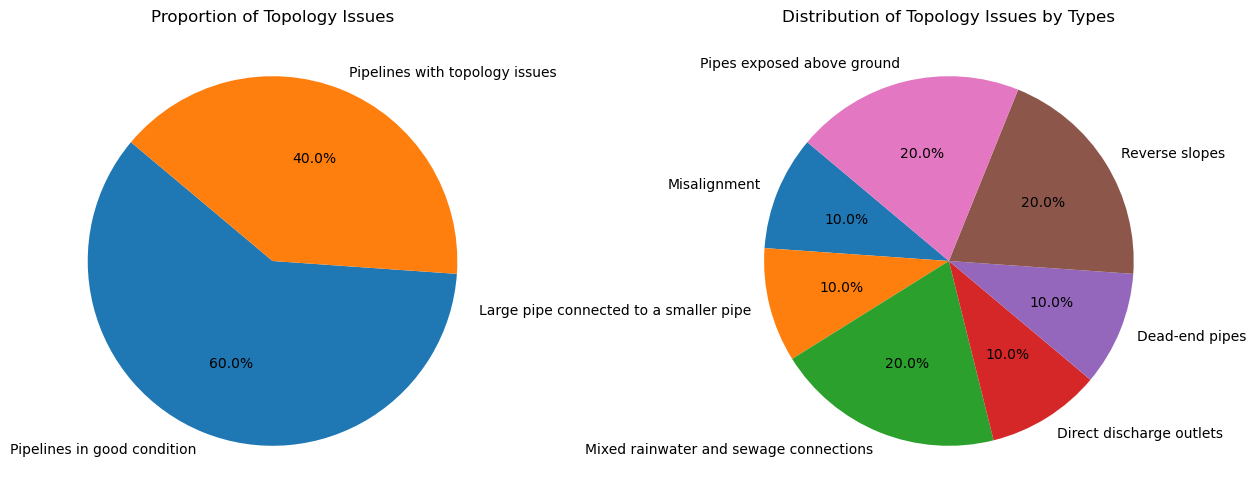

In [14]:
print("Out of the 20 pipelines:")
print("12 are functioning properly")
print("8 have topology issues")
print("10 different types of topology issues")

# Enable inline plotting in the notebook
%matplotlib inline

# Sample data for the Proportion of Topology Issues
data_tp_count = {'Facility': ['Pipelines in good condition', 'Pipelines with topology issues'],
        'Count': [12, 8]}

# Convert to DataFrame
df_tp_count  = pd.DataFrame(data_tp_count)

# Sample data for the Proportion of Topology Issues
data_tp_type = {'Type': ['Misalignment', 'Large pipe connected to a smaller pipe','Mixed rainwater and sewage connections'
                        ,'Direct discharge outlets', 'Dead-end pipes', 'Reverse slopes', 'Pipes exposed above ground'],
        'Count': [1, 1,2,1,1,2,2]}

# Convert to DataFrame
df_tp_type  = pd.DataFrame(data_tp_type)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First pie chart
axs[0].pie(df_tp_count['Count'], labels=df_tp_count['Facility'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Proportion of Topology Issues')

# Second pie chart
axs[1].pie(df_tp_type['Count'], labels=df_tp_type['Type'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Topology Issues by Types')

# Display the pie charts
plt.show()

In [15]:
# Sample data with additional columns
data_types = {
    'Type of Issue': [
        'Misalignment', 
        'Large pipe connected to a smaller pipe', 
        'Mixed rainwater and sewage connections',
        'Direct discharge outlets', 
        'Dead-end pipes', 
        'Reverse slopes', 
        'Pipes exposed above ground'
    ],
    'Level 1': [1, 2, 1, 0, 0, 1, 0],
    'Level 2': [2, 3, 0, 1, 1, 2, 1],
    'Level 3': [1, 1, 2, 0, 1, 1, 0],
    'Level 4': [1, 2, 0, 1, 1, 2, 0],
    'Total': [5, 8, 3, 2, 4, 6, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data_types)

# Display the table
display(df)

,Type of Issue,Level 1,Level 2,Level 3,Level 4,Total
0,Misalignment,1,2,1,1,5
1,Large pipe connected to a smaller pipe,2,3,1,2,8
2,Mixed rainwater and sewage connections,1,0,2,0,3
3,Direct discharge outlets,0,1,0,1,2
4,Dead-end pipes,0,1,1,1,4
5,Reverse slopes,1,2,1,2,6
6,Pipes exposed above ground,0,1,0,0,1


# Next Steps

With sufficient data, when planning the maintenance or repaire of a pipeline, we can assess the affected neighborhoods and the environmental impact. Additionally, use Infoworks' model to evaluate potential internal flooding.